In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np

Data Import - COMPAS data files available at https://github.com/propublica/compas-analysis (put in data folder)


In [6]:
df = pd.read_csv("data/compas-scores-two-years.csv")
df_violent = pd.read_csv("data/compas-scores-two-years-violent.csv")
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [7]:
print ("score", "\t", "#AA", "\t", "#Cauc")
for sc in range(1,11):
  df_part = df[df['decile_score'] == sc]
  df_part_aa = df_part[df_part['race'] == "African-American"]
  df_part_ca = df_part[df_part['race'] == "Caucasian"]

  print (sc, "\t", len(df_part_aa), "\t", len(df_part_ca))

score 	 #AA 	 #Cauc
1 	 398 	 681
2 	 393 	 361
3 	 346 	 273
4 	 385 	 285
5 	 365 	 241
6 	 384 	 194
7 	 400 	 143
8 	 359 	 114
9 	 380 	 98
10 	 286 	 64


Pre-processing data

In [8]:
df_clean = df[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count', 'is_violent_recid', 'c_arrest_date', 'c_offense_date', 'screening_date',
               'days_b_screening_arrest', 'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out', 'v_decile_score']]
df_clean = df_clean[(df_clean['days_b_screening_arrest'] <= 30) & (df_clean['days_b_screening_arrest'] >= -30)]
df_clean = df_clean[df_clean['is_recid'] != -1]
df_clean = df_clean[df_clean['c_charge_degree'] != "O"]
df_clean = df_clean[df_clean['score_text'] != 'N/A']
df_clean = df_clean[df_clean['race'].isin(['African-American', 'Caucasian'])]
print(df_clean.shape[0])

5278


In [9]:
df_clean['length_of_stay'] = (pd.to_datetime(df_clean['c_jail_out']) - pd.to_datetime(df_clean['c_jail_in'])).dt.days.astype(float)
df_clean[['length_of_stay', 'decile_score']].corr().iloc[0,1]

0.20388361454737944

In [10]:
df_violent_clean = df_violent[['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count', 'is_violent_recid', 'c_arrest_date', 'c_offense_date', 'screening_date',
                'days_b_screening_arrest', 'decile_score', 'is_recid', 'two_year_recid', 'c_jail_in', 'c_jail_out', 'v_decile_score']]
#df_clean = df_clean[(df_clean['days_b_screening_arrest'] <= 30) & (df_clean['days_b_screening_arrest'] >= -30)]
#df_clean = df_clean[df_clean['is_recid'] != -1]
#df_clean = df_clean[df_clean['c_charge_degree'] != "O"]
#df_clean = df_clean[df_clean['score_text'] != 'N/A']
df_violent_clean = df_violent_clean[df_violent_clean["race"].isin(["African-American", "Caucasian"])]
print(df_violent_clean.shape[0])

3967


In [11]:
df_clean["decile_score_trans"] = (df_clean["decile_score"] - 1)/9
df_clean["v_decile_score_trans"] = (df_clean["v_decile_score"] - 1)/9

In [12]:
df_violent_clean["decile_score_trans"] = (df_violent_clean["decile_score"] - 1)/9
df_violent_clean["v_decile_score_trans"] = (df_violent_clean["v_decile_score"] - 1)/9

Base rate tracking metrics computation

In [14]:
def compute_metrics(df_clean, column="race", value="Hispanic"):
  len_ = len(df_clean[df_clean[column]==value])
  print("There are n={} {}s out of {} ({:.2f}%)".format(len_, value, len(df_clean), 100*len_/len(df_clean)))

  avg_risk_gen = df_clean[df_clean[column]==value]["decile_score"].mean()
  avg_risk_vio = df_clean[df_clean[column]==value]["v_decile_score"].mean()

  print("Average risk score of general recidivism of {}:".format(value), avg_risk_gen)
  print("Average risk score of violent general recidivism of {}:".format(value), avg_risk_vio)

  avg_risk_gen = df_clean[df_clean[column]==value]["decile_score_trans"].mean()
  avg_risk_vio = df_clean[df_clean[column]==value]["v_decile_score_trans"].mean()

  print("\nAverage normalized risk score of general recidivism of {}:".format(value), avg_risk_gen)
  print("Average normalized risk score of violent general recidivism of {}:".format(value), avg_risk_vio)

  #### Base rate
  rein = df_clean[df_clean[column]==value]["is_recid"].sum()
  total = len(df_clean[df_clean[column]==value])

  print("\n{} recidivated {}. It's {}".format(value, rein, rein/total))

  rein = df_clean[df_clean[column]==value]["is_violent_recid"].sum()
  total = len(df_clean[df_clean[column]==value])

  print("{} who violently recidivated {}. It's a {}".format(value, rein, rein/total))
  print("\n--------------- \n")

In [15]:
df_clean["race"].unique()

array(['African-American', 'Caucasian'], dtype=object)

In [16]:
for race in df_clean["race"].unique():
  compute_metrics(df_clean, "race", race)

There are n=3175 African-Americans out of 5278 (60.16%)
Average risk score of general recidivism of African-American: 5.276850393700787
Average risk score of violent general recidivism of African-American: 4.329448818897638

Average normalized risk score of general recidivism of African-American: 0.47520559930008743
Average normalized risk score of violent general recidivism of African-American: 0.36993875765529305

African-American recidivated 1773. It's 0.5584251968503937
African-American who violently recidivated 426. It's a 0.1341732283464567

--------------- 

There are n=2103 Caucasians out of 5278 (39.84%)
Average risk score of general recidivism of Caucasian: 3.635282929148835
Average risk score of violent general recidivism of Caucasian: 2.907275320970043

Average normalized risk score of general recidivism of Caucasian: 0.29280921434987056
Average normalized risk score of violent general recidivism of Caucasian: 0.21191948010778255

Caucasian recidivated 874. It's 0.415596766

In [17]:
def compute_metrics_violent(df_clean, column="race", value="Hispanic"):
  len_ = len(df_clean[df_clean[column]==value])
  print("There are n={} {}s out of {} ({:.2f}%)".format(len_, value, len(df_clean), 100*len_/len(df_clean)))

  avg_risk_vio = df_clean[df_clean[column]==value]["v_decile_score"].mean()

  print("Average risk score of violent general recidivism of {}:".format(value), avg_risk_vio)

  avg_risk_vio = df_clean[df_clean[column]==value]["v_decile_score_trans"].mean()

  print("Average normalized risk score of violent general recidivism of {}:".format(value), avg_risk_vio)

  #### Base rate
  rein = df_clean[df_clean[column]==value]["is_recid"].sum()
  total = len(df_clean[df_clean[column]==value])

  print("\n{} recidivated {}. It's {}".format(value, rein, rein/total))

  rein = df_clean[df_clean[column]==value]["is_violent_recid"].sum()
  total = len(df_clean[df_clean[column]==value])

  print("{} who violently recidivated {}. It's a {}".format(value, rein, rein/total))
  print("\n--------------- \n")

In [18]:
for race in df_violent_clean["race"].unique():
  compute_metrics_violent(df_violent_clean, "race", race)

There are n=2266 African-Americans out of 3967 (57.12%)
Average risk score of violent general recidivism of African-American: 4.051632833186232
Average normalized risk score of violent general recidivism of African-American: 0.33907031479847016

African-American recidivated 606. It's 0.2674315975286849
African-American who violently recidivated 495. It's a 0.21844660194174756

--------------- 

There are n=1701 Caucasians out of 3967 (42.88%)
Average risk score of violent general recidivism of Caucasian: 2.6696061140505587
Average normalized risk score of violent general recidivism of Caucasian: 0.18551179045006205

Caucasian recidivated 268. It's 0.157554379776602
Caucasian who violently recidivated 222. It's a 0.13051146384479717

--------------- 



Bootstraping confidence intervals

In [19]:
from scipy.stats import permutation_test

def get_diff_diff_stat(avg_risk_gen_1, avg_risk_gen_2, rein_1, rein_2):
  l1 = avg_risk_gen_1 - avg_risk_gen_2
  l2 = rein_1 - rein_2

  return l1 - l2

def get_ratio_diff_stat(avg_risk_gen_1, avg_risk_gen_2, rein_1, rein_2):
  l1 = avg_risk_gen_1 - avg_risk_gen_2
  l2 = rein_1 - rein_2

  return l1/l2


def get_diff_ratio_stat(avg_risk_gen_1, avg_risk_gen_2, rein_1, rein_2):
  l1 = avg_risk_gen_1/avg_risk_gen_2
  l2 = rein_1/rein_2

  return l1 - l2


def get_ratio_ratio_stat(avg_risk_gen_1, avg_risk_gen_2, rein_1, rein_2):
  l1 = avg_risk_gen_1/avg_risk_gen_2
  l2 = rein_1/rein_2

  return l1/l2




In [20]:
def get_bootstraped_metrics(df, column, value, is_violent=False, transformed=False):
  target_column = "decile_score" if not is_violent else "v_decile_score"
  target_column_recid = "is_recid" if not is_violent else "is_violent_recid"
  trans_target_column = target_column + "_trans"

  avg_risk_gen_1 = df[df[column]==value][target_column]
  avg_risk_gen_1_trans = df[df[column]==value][trans_target_column]
  rein_1 = df[df[column]==value][target_column_recid]

  avg_risk_gen_2 = df[df[column]!=value][target_column]
  avg_risk_gen_2_trans = df[df[column]!=value][trans_target_column]
  rein_2 = df[df[column]!=value][target_column_recid]

  return np.mean(avg_risk_gen_1), np.mean(avg_risk_gen_2), np.mean(avg_risk_gen_1_trans), np.mean(avg_risk_gen_2_trans), np.mean(rein_1), np.mean(rein_2)

In [21]:
from tqdm import trange

avg_risk_gen_1 = []
avg_risk_gen_2 = []
avg_risk_gen_1_trans = []
avg_risk_gen_2_trans = []
rein_1 = []
rein_2 = []

for _ in trange(1000):
  chosen_idx = np.random.choice(range(len(df_clean)), replace=True, size=len(df_clean))
  df2 = df_clean.iloc[chosen_idx]
  av1, av2, av1_trans, av2_trans, r1, r2 = get_bootstraped_metrics(df2, "race", "African-American")
  avg_risk_gen_1.append(av1)
  avg_risk_gen_2.append(av2)
  avg_risk_gen_1_trans.append(av1_trans)
  avg_risk_gen_2_trans.append(av2_trans)
  rein_1.append(r1)
  rein_2.append(r2)

100%|██████████| 1000/1000 [00:10<00:00, 96.51it/s]


In [22]:
print ("Mean avg_risk_gen_1: ", np.mean(avg_risk_gen_1))
print ("CI: ",  np.mean(avg_risk_gen_1) - np.quantile(avg_risk_gen_1, (0.025, 0.975))[0], "\n")

print ("Mean avg_risk_gen_2: ", np.mean(avg_risk_gen_2))
print ("CI: ",  np.mean(avg_risk_gen_2) - np.quantile(avg_risk_gen_2, (0.025, 0.975))[0], "\n")

print ("Mean avg_risk_gen_1_trans: ", np.mean(avg_risk_gen_1_trans))
print ("CI: ",  np.mean(avg_risk_gen_1_trans) - np.quantile(avg_risk_gen_1_trans, (0.025, 0.975))[0], "\n")

print ("Mean avg_risk_gen_2_trans: ", np.mean(avg_risk_gen_2_trans))
print ("CI: ",  np.mean(avg_risk_gen_2_trans) - np.quantile(avg_risk_gen_2_trans, (0.025, 0.975))[0], "\n")

print ("Mean avg_risk_gen_2: ", np.mean(avg_risk_gen_2))
print ("CI: ",  np.mean(avg_risk_gen_2) - np.quantile(avg_risk_gen_2, (0.025, 0.975))[0], "\n")

print ("Mean rein_1: ", np.mean(rein_1))
print ("CI: ",  np.mean(rein_1) - np.quantile(rein_1, (0.025, 0.975))[0], "\n")

print ("Mean rein_2: ", np.mean(rein_2))
print ("CI: ",  np.mean(rein_2) - np.quantile(rein_2, (0.025, 0.975))[0], "\n")

Mean avg_risk_gen_1:  5.276370675926706
CI:  0.10345118239863016 

Mean avg_risk_gen_2:  3.6324809304035175
CI:  0.10725733922783354 

Mean avg_risk_gen_1_trans:  0.4751522973251896
CI:  0.011494575822070197 

Mean avg_risk_gen_2_trans:  0.2924978811559464
CI:  0.011917482136425961 

Mean avg_risk_gen_2:  3.6324809304035175
CI:  0.10725733922783354 

Mean rein_1:  0.5584974573432759
CI:  0.018359529386208218 

Mean rein_2:  0.41545034736339115
CI:  0.022422760237383266 



In [23]:
stats = get_diff_diff_stat(np.array(avg_risk_gen_1_trans), np.array(avg_risk_gen_2_trans), np.array(rein_1), np.array(rein_2))
print ("Difference-of-difference metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")


stats = get_ratio_diff_stat(np.array(avg_risk_gen_1_trans), np.array(avg_risk_gen_2_trans), np.array(rein_1), np.array(rein_2))
print ("Ratio-of-difference metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")


stats = get_diff_ratio_stat(np.array(avg_risk_gen_1), np.array(avg_risk_gen_2), np.array(rein_1), np.array(rein_2))
print ("Difference-of-Ratio metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")


stats = get_ratio_ratio_stat(np.array(avg_risk_gen_1), np.array(avg_risk_gen_2), np.array(rein_1), np.array(rein_2))
print ("Ratio-of-ratio metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")



Difference-of-difference metric
Mean val:  0.039607306189358364
95% CI:  [0.01281567 0.06515442]
CI:  0.026791639231100853 

Ratio-of-difference metric
Mean val:  1.287217786775948
95% CI:  [1.07327846 1.53832651]
CI:  0.21393932753762623 

Difference-of-Ratio metric
Mean val:  0.10766762938258843
95% CI:  [0.02298528 0.18275095]
CI:  0.08468234875862021 

Ratio-of-ratio metric
Mean val:  1.0808270101723625
95% CI:  [1.01654343 1.14156615]
CI:  0.06428357569398968 



In [25]:
from tqdm import trange

avg_risk_gen_1 = []
avg_risk_gen_2 = []
avg_risk_gen_1_trans = []
avg_risk_gen_2_trans = []
rein_1 = []
rein_2 = []

for _ in trange(1000):
  chosen_idx = np.random.choice(range(len(df_violent_clean)), replace=True, size=len(df_violent_clean))
  df2 = df_violent_clean.iloc[chosen_idx]
  av1, av2, av1_trans, av2_trans, r1, r2 = get_bootstraped_metrics(df2, "race", "African-American", True)
  avg_risk_gen_1.append(av1)
  avg_risk_gen_2.append(av2)
  avg_risk_gen_1_trans.append(av1_trans)
  avg_risk_gen_2_trans.append(av2_trans)
  rein_1.append(r1)
  rein_2.append(r2)

100%|██████████| 1000/1000 [00:12<00:00, 80.34it/s]


In [26]:
print ("Mean avg_risk_gen_1: ", np.mean(avg_risk_gen_1))
print ("CI: ",  np.mean(avg_risk_gen_1) - np.quantile(avg_risk_gen_1, (0.025, 0.975))[0], "\n")

print ("Mean avg_risk_gen_2: ", np.mean(avg_risk_gen_2))
print ("CI: ",  np.mean(avg_risk_gen_2) - np.quantile(avg_risk_gen_2, (0.025, 0.975))[0], "\n")

print ("Mean avg_risk_gen_1_trans: ", np.mean(avg_risk_gen_1_trans))
print ("CI: ",  np.mean(avg_risk_gen_1_trans) - np.quantile(avg_risk_gen_1_trans, (0.025, 0.975))[0], "\n")

print ("Mean avg_risk_gen_2_trans: ", np.mean(avg_risk_gen_2_trans))
print ("CI: ",  np.mean(avg_risk_gen_2_trans) - np.quantile(avg_risk_gen_2_trans, (0.025, 0.975))[0], "\n")

print ("Mean rein_1: ", np.mean(rein_1))
print ("CI: ",  np.mean(rein_1) - np.quantile(rein_1, (0.025, 0.975))[0], "\n")

print ("Mean rein_2: ", np.mean(rein_2))
print ("CI: ",  np.mean(rein_2) - np.quantile(rein_2, (0.025, 0.975))[0], "\n")

Mean avg_risk_gen_1:  4.051245076579951
CI:  0.11132796199888828 

Mean avg_risk_gen_2:  2.6708027910094154
CI:  0.09664469055080893 

Mean avg_risk_gen_1_trans:  0.33902723073110574
CI:  0.012369773555432062 

Mean avg_risk_gen_2_trans:  0.18564475455660176
CI:  0.010738298950089903 

Mean rein_1:  0.21868788700700648
CI:  0.016359238428860307 

Mean rein_2:  0.13057433757728057
CI:  0.01523740584063904 



In [27]:
stats = get_diff_diff_stat(np.array(avg_risk_gen_1_trans), np.array(avg_risk_gen_2_trans), np.array(rein_1), np.array(rein_2))
print ("Difference-of-difference metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")


stats = get_ratio_diff_stat(np.array(avg_risk_gen_1_trans), np.array(avg_risk_gen_2_trans), np.array(rein_1), np.array(rein_2))
print ("Ratio-of-difference metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")


stats = get_diff_ratio_stat(np.array(avg_risk_gen_1), np.array(avg_risk_gen_2), np.array(rein_1), np.array(rein_2))
print ("Difference-of-Ratio metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")


stats = get_ratio_ratio_stat(np.array(avg_risk_gen_1), np.array(avg_risk_gen_2), np.array(rein_1), np.array(rein_2))
print ("Ratio-of-ratio metric")
print ("Mean val: ", np.mean(stats))
print ("95% CI: ", np.quantile(stats, (0.025, 0.975)))
print ("CI: ",  np.mean(stats) - np.quantile(stats, (0.025, 0.975))[0], "\n")



Difference-of-difference metric
Mean val:  0.06526892674477809
95% CI:  [0.0399621  0.08986973]
CI:  0.02530682657410835 

Ratio-of-difference metric
Mean val:  1.7715457347089736
95% CI:  [1.36044913 2.35222254]
CI:  0.41109660260820213 

Difference-of-Ratio metric
Mean val:  -0.16423889264759647
95% CI:  [-0.44529353  0.05902772]
CI:  0.28105463862965496 

Ratio-of-ratio metric
Mean val:  0.9070515638518738
95% CI:  [0.77555083 1.0402787 ]
CI:  0.13150073068655843 



In [ ]:
# @title Replication of Flores paper plots

In [ ]:
import numpy as np
df2 = df[df['is_recid'] != -1]
df2 = df2[(df2['days_b_screening_arrest'] <= 30) & (df2['days_b_screening_arrest'] >= -30)]
df2 = df2[df2['c_charge_degree'] != "O"]
df2 = df2[df2['score_text'] != 'N/A']
df2['sex_bin'] = df2['sex'] == "Female"
df2 = df2[df2['race'].isin(['African-American', 'Caucasian'])]
df2['race_bin'] = df2['race'] == "African-American"


# labels_aa, labels_ca = [], []
# for score in range(1, 10):
#    labels_aa.append(np.mean(df2[df2['decile_score'] == score][df2['race'] == "African-American"]['is_recid']))
#    labels_ca.append(np.mean(df2[df2['decile_score'] == score][df2['race'] == "Caucasian"]['is_recid']))


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

res = smf.logit(formula='is_recid ~ age + sex_bin + race_bin + decile_score + race_bin*decile_score', data=df2).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.615546
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               is_recid   No. Observations:                 5278
Model:                          Logit   Df Residuals:                     5272
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Sep 2023   Pseudo R-squ.:                  0.1119
Time:                        01:45:40   Log-Likelihood:                -3248.9
converged:                       True   LL-Null:                       -3658.4
Covariance Type:            nonrobust   LLR p-value:                8.484e-175
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.7923      0.153     -5.166      0.000      -1.093      -0.492
sex_bin[T.True]                  -0.5604      0.076     -7.333      0.000      -0.710      -0.411
race_bin[T.True]                  0.1776      0.121      1.464      0.143      -0.060       0.415
age                              -0.0111      0.003     -3.937      0.000      -0.017      -0.006
decile_score                      0.2649      0.020     13.016      0.000       0.225       0.305
race_bin[T.True]:decile_score    -0.0111      0.024     -0.452      0.651      -0.059       0.037
=================================================================================================
"""

In [ ]:
df2['prediction'] = res.predict()

Score: 1 Calibration - AA:  0.27910735789867397 Calibration - Cauc:  0.2365582030846065
Score: 2 Calibration - AA:  0.35559619016203814 Calibration - Cauc:  0.3162702683418854
Score: 3 Calibration - AA:  0.4241473246801042 Calibration - Cauc:  0.376556322087205
Score: 4 Calibration - AA:  0.49013054491191144 Calibration - Cauc:  0.45483045303438774
Score: 5 Calibration - AA:  0.5470989159606485 Calibration - Cauc:  0.5083420497123164
Score: 6 Calibration - AA:  0.6102812035547651 Calibration - Cauc:  0.5618394384095178
Score: 7 Calibration - AA:  0.6762626412966523 Calibration - Cauc:  0.6347252902783573
Score: 8 Calibration - AA:  0.729603112002248 Calibration - Cauc:  0.70680452537869
Score: 9 Calibration - AA:  0.7794606382398597 Calibration - Cauc:  0.7594190832396849
Score: 10 Calibration - AA:  0.8241392889681278 Calibration - Cauc:  0.7920028903341272


<ipython-input-25-65f419328002>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prob_score_aa = np.mean(df2[df2['decile_score'] == score][df2['race'] == "African-American"]['prediction'])
<ipython-input-25-65f419328002>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prob_score_ca = np.mean(df2[df2['decile_score'] == score][df2['race'] == "Caucasian"]['prediction'])


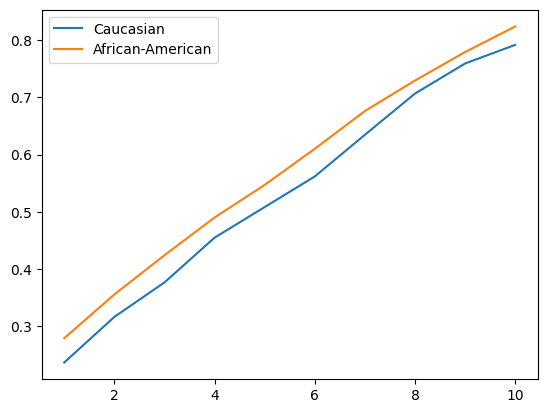

In [ ]:
import matplotlib.pyplot as plt

p_aa, p_ca = [], []
for score in range(1, 11):
  prob_score_aa = np.mean(df2[df2['decile_score'] == score][df2['race'] == "African-American"]['prediction'])
  p_aa.append(prob_score_aa)
  prob_score_ca = np.mean(df2[df2['decile_score'] == score][df2['race'] == "Caucasian"]['prediction'])
  p_ca.append(prob_score_ca)

  print ("Score:", score, "Calibration - AA: ", prob_score_aa, "Calibration - Cauc: ", prob_score_ca)

xs = range(1,11)
plt.plot(xs, p_ca, label="Caucasian")
plt.plot(xs, p_aa, label="African-American")
plt.legend()